# **Twitter-sentiment-analysis**

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Importing dataset
df_init = pd.read_csv("/content/Tweets.csv")

In [ ]:
df_init.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Select only the necessary columns for sentiment analysis
df = df_init[['airline_sentiment', 'text']].copy()

In [ ]:
# Checking the result
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


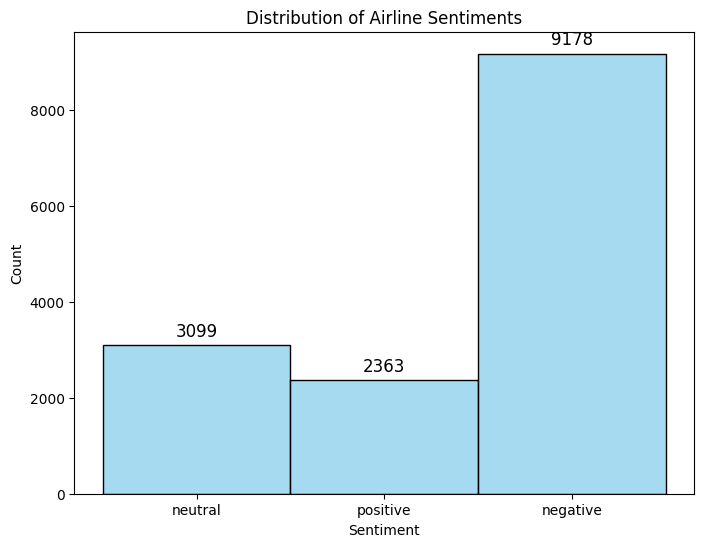

In [ ]:
# Count the occurrences of each sentiment category
sentiment_counts = df['airline_sentiment'].value_counts()

# Visualize the distribution using a histogram with counts on bars
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['airline_sentiment'], bins=3, color='skyblue', discrete=True)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Airline Sentiments')

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, xytext=(0, 10), textcoords='offset points')

plt.xticks()
plt.show()

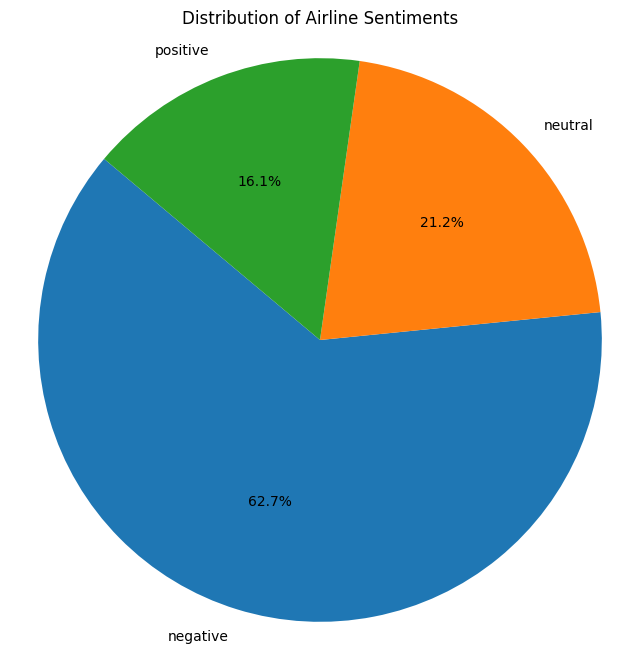

In [ ]:
# Visualize the distribution of airline sentiments using a pie chart
sentiment_counts = df['airline_sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Airline Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Create a mapping dictionary to convert sentiment labels to numerical values
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}

# Remove leading and trailing whitespaces from 'airline_sentiment' column
df['airline_sentiment'] = df['airline_sentiment'].str.strip()

# Apply the mapping to create a new 'target' column with numerical sentiment values
df['target'] = df['airline_sentiment'].map(target_map)

In [ ]:
# Checking the result
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [ ]:
# Split the dataset into training and testing sets
df_train, df_test = train_test_split(df)

In [ ]:
# Checking the Result
df_train.head()

,airline_sentiment,text,target
5500,negative,@SouthwestAir 14 hours???? Sorry don't get it...,0
13761,neutral,@AmericanAir 48 hours and still no bag. Could ...,2
8887,negative,@JetBlue @KyleJudah I just spoke to the baggag...,0
1428,negative,"@united clicked ""upgrade now"" and it didn't up...",0
6789,positive,@JetBlue wouldn't mind paying for the snacks b...,1


In [ ]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)
x_train = vectorizer.fit_transform(df_train['text'])
x_test = vectorizer.transform(df_test['text'])
y_train = df_train['target']
y_test = df_test['target']

In [ ]:
# Train a logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
# Evaluate the model
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.8534608378870674
Test accuracy:  0.8


In [ ]:
# Predict probabilities for ROC AUC calculation
Pr_train = model.predict_proba(x_train)
Pr_test = model.predict_proba(x_test)
train_auc = roc_auc_score(y_train, Pr_train, multi_class='ovo')
test_auc = roc_auc_score(y_test, Pr_test, multi_class='ovo')
print('Train AUC: ', train_auc)
print('Test AUC: ', test_auc)

Train AUC:  0.9439124525725084
Test AUC:  0.8934113729410794


In [ ]:
# Predict labels for confusion matrix
P_train = model.predict(x_train)
P_test = model.predict(x_test)

In [ ]:
# Create a normalized confusion matrix for the training set
cm_train = confusion_matrix(y_train, P_train, normalize='true')
cm_train

array([[0.96075581, 0.00930233, 0.02994186],
       [0.19596865, 0.71444569, 0.08958567],
       [0.31158168, 0.04667243, 0.64174589]])

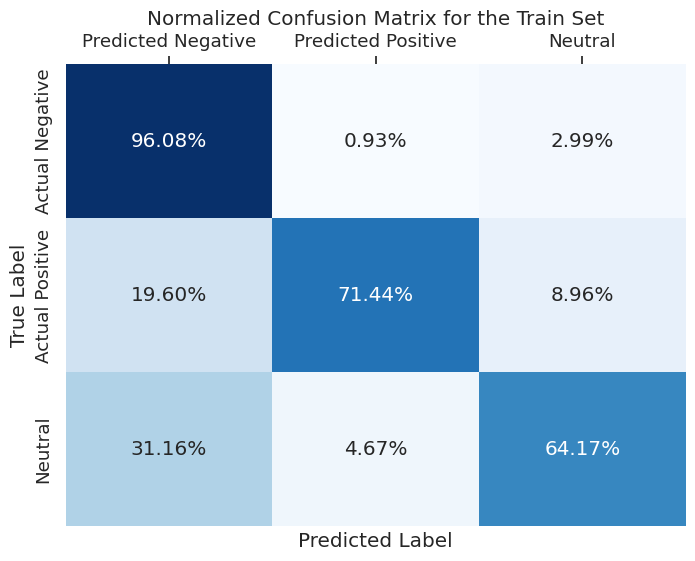

In [ ]:
# Create a heatmap for the confusion matrix (training set)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(cm_train, annot=True, fmt='.2%', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive', 'Neutral'],
            yticklabels=['Actual Negative', 'Actual Positive', 'Neutral'])
heatmap.xaxis.set_ticks_position('top')  # Move x-axis labels to the top
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for the Train Set')
plt.show()

In [ ]:
# Create a normalized confusion matrix for the testing set
cm_test = confusion_matrix(y_test, P_test, normalize='true')
cm_test

array([[0.93559617, 0.01174935, 0.05265448],
       [0.23570191, 0.63431542, 0.12998267],
       [0.39745223, 0.07770701, 0.52484076]])

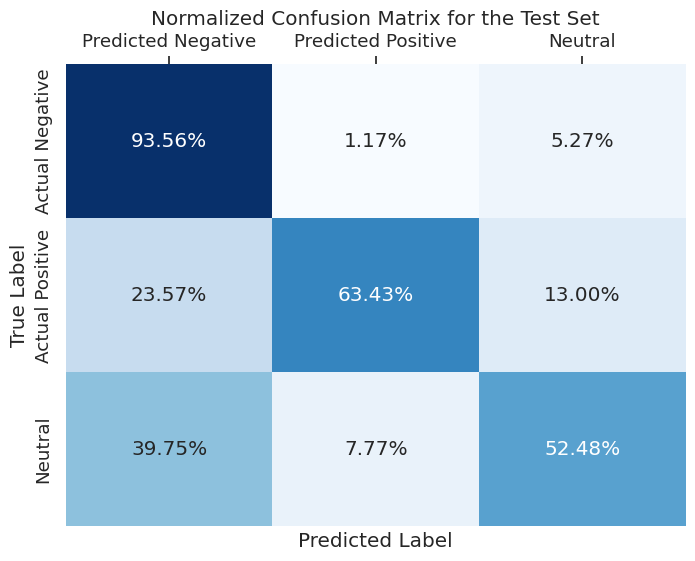

In [ ]:
# Create a heatmap for the confusion matrix (testing set)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(cm_test, annot=True, fmt='.2%', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive', 'Neutral'],
            yticklabels=['Actual Negative', 'Actual Positive', 'Neutral'])
heatmap.xaxis.set_ticks_position('top')  # Move x-axis labels to the top
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for the Test Set')
plt.show()

In [ ]:
# Filter the dataset to focus on binary sentiment classification (positive vs. negative)
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [ ]:
# Vectorize text data for the binary sentiment classification
x_train = vectorizer.fit_transform(df_b_train['text'])
x_test = vectorizer.transform(df_b_test['text'])
y_train = df_b_train['target']
y_test = df_b_test['target']

In [ ]:
# Train a logistic regression model for binary classification
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)
binary_train_accuracy = model.score(x_train, y_train)
binary_test_accuracy = model.score(x_test, y_test)
print('Binary Train accuracy: ', binary_train_accuracy)
print('Binary Test accuracy: ', binary_test_accuracy)

Binary Train accuracy:  0.9285714285714286
Binary Test accuracy:  0.9193043478260869


In [ ]:
# Predict probabilities for ROC AUC calculation (binary classification)
Pr_train = model.predict_proba(x_train)[:, 1]
Pr_test = model.predict_proba(x_test)[:, 1]
binary_train_auc = roc_auc_score(y_train, Pr_train)
binary_test_auc = roc_auc_score(y_test, Pr_test)
print('Binary Train AUC: ', binary_train_auc)
print('Binary Test AUC: ', binary_test_auc)

Binary Train AUC:  0.978621472889919
Binary Test AUC:  0.9521500121422742


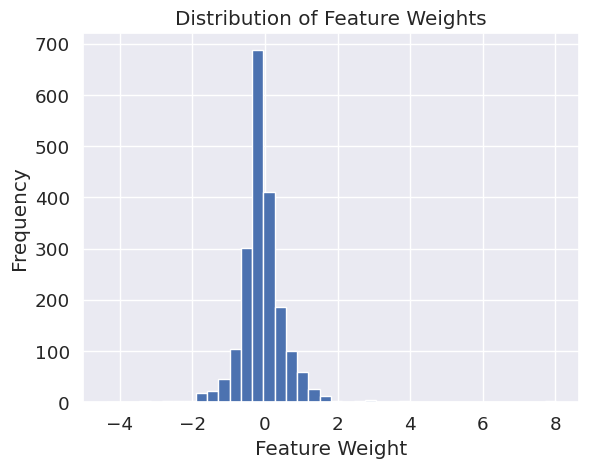

In [ ]:
# Plot a histogram of feature weights (coefficients)
plt.hist(model.coef_[0], bins=40)
plt.xlabel('Feature Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Weights')
plt.show()

In [ ]:
# Get the vocabulary index map
word_index_map = vectorizer.vocabulary_

In [ ]:
# Define a threshold for identifying most positive and most negative words
threshold = 2

In [ ]:
# Identify and print the most positive words
print('Most Positive Words')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most Positive Words
southwestair 2.8975295896515596
jetblue 3.022341341993024
great 5.187821501990559
thanks 7.817959287364075
best 3.980654511470602
thank 8.036257860424149
love 4.24993832223975
thx 2.7429341466590267
virginamerica 3.3983543667635443
good 3.1977965898142444
awesome 3.817334476373398
kudos 2.612324149761353
appreciate 2.9746728783257566
amazing 3.768138524748776
worries 3.0178492334283913
excellent 2.7561373146172596


In [ ]:
# Identify and print the most negative words
print('Most Negative Words')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most Negative Words
hours -3.4245003911203726
no -3.5906289314803552
not -4.395587611889142
what -2.308678524789247
why -2.2694435589695896
hold -2.7436232036515555
nothing -2.234039738632879
can -2.032550274750581
delayed -2.6217061038898564
cancelled -3.222833141791383
worst -3.0177919597907983
